# COCO eye tracking and segmentation

Please check the README file for the data setup!

Importing libraries

In [1]:
import os
import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path
import random
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
from collections import Counter


Exploring COCO

Annotation file found: Data/annotations/instances_val2017.json
Image folder found: Data/val2017/
First 5 images in the folder:
['000000182611.jpg', '000000335177.jpg', '000000278705.jpg', '000000463618.jpg', '000000568981.jpg']


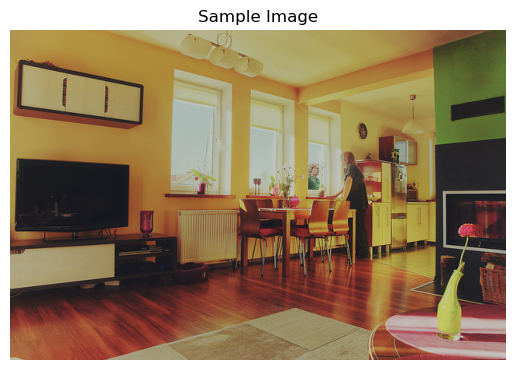

In [2]:
annotation_file = "Data/annotations/instances_val2017.json"
image_folder = "Data/val2017/"

if os.path.exists(annotation_file):
    print(f"Annotation file found: {annotation_file}")
else:
    print(f"Annotation file NOT found: {annotation_file}")

if os.path.isdir(image_folder):
    print(f"Image folder found: {image_folder}")
else:
    print(f"Image folder NOT found: {image_folder}")

if os.path.isdir(image_folder):
    print("First 5 images in the folder:")
    print(os.listdir(image_folder)[:5])


image_path = os.path.join("Data/val2017", "000000000139.jpg")
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.title("Sample Image")
plt.show()

Explore keys

In [3]:
annotation_file = "Data/annotations/instances_val2017.json"

with open(annotation_file, 'r') as file:
    data = json.load(file)

print("Keys in the dataset:")
for key in data.keys():
    print(f"- {key}")

for key in data.keys():
    print(f"{key}:")  
    if isinstance(data[key], list): 
        print(f"First 2 entries in {key}:")
        pprint(data[key][:2])  
    else:
        pprint(data[key]) 
    print("-----------------")



Keys in the dataset:
- info
- licenses
- images
- annotations
- categories
info:
{'contributor': 'COCO Consortium',
 'date_created': '2017/09/01',
 'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017}
-----------------
licenses:
First 2 entries in licenses:
[{'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'},
 {'id': 2,
  'name': 'Attribution-NonCommercial License',
  'url': 'http://creativecommons.org/licenses/by-nc/2.0/'}]
-----------------
images:
First 2 entries in images:
[{'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
  'date_captured': '2013-11-14 17:02:52',
  'file_name': '000000397133.jpg',
  'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
  'height': 427,
  'id': 397133,
  'license': 4,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg',
  'date_captured': 

Mask on the image

Print all the information about one image of the dataset

In [4]:
annotation_file = "Data/annotations/instances_val2017.json"  
image_folder = "val2017" 
target_image_file = "000000000139.jpg"  

with open(annotation_file, 'r') as f:
    coco_data = json.load(f)

image_id = None
image_metadata = None
for image in coco_data['images']:
    if image['file_name'] == target_image_file:
        image_id = image['id']
        image_metadata = image
        break

if image_id is None:
    print(f"Image {target_image_file} not found in the dataset.")
else:
    print(f"Metadata for image {target_image_file}:")
    print(image_metadata)

    related_annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]

    print(f"\nAnnotations related to image {target_image_file} (Image ID: {image_id}):")
    for ann in related_annotations:
        print(f"- Annotation ID: {ann['id']}")
        print(f"  Category ID: {ann['category_id']}")
        print(f"  Segmentation: {ann['segmentation']}")
        print(f"  Bounding Box: {ann['bbox']}")
        print(f"  Area: {ann['area']}")
        print(f"  Is Crowd: {ann['iscrowd']}")
        print("---")

    category_map = {cat['id']: cat['name'] for cat in coco_data['categories']}
    for ann in related_annotations:
        category_name = category_map.get(ann['category_id'], "Unknown")
        print(f"Category Name for Annotation {ann['id']}: {category_name}")


Metadata for image 000000000139.jpg:
{'license': 2, 'file_name': '000000000139.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000000139.jpg', 'height': 426, 'width': 640, 'date_captured': '2013-11-21 01:34:01', 'flickr_url': 'http://farm9.staticflickr.com/8035/8024364858_9c41dc1666_z.jpg', 'id': 139}

Annotations related to image 000000000139.jpg (Image ID: 139):
- Annotation ID: 26547
  Category ID: 64
  Segmentation: [[240.86, 211.31, 240.16, 197.19, 236.98, 192.26, 237.34, 187.67, 245.8, 188.02, 243.33, 176.02, 250.39, 186.96, 251.8, 166.85, 255.33, 142.51, 253.21, 190.49, 261.68, 183.08, 258.86, 191.2, 260.98, 206.37, 254.63, 199.66, 252.51, 201.78, 251.8, 212.01]]
  Bounding Box: [236.98, 142.51, 24.7, 69.5]
  Area: 531.8071000000001
  Is Crowd: 0
---
- Annotation ID: 34646
  Category ID: 72
  Segmentation: [[9.66, 167.76, 156.35, 173.04, 153.71, 256.48, 82.56, 262.63, 7.03, 260.87]]
  Bounding Box: [7.03, 167.76, 149.32, 94.87]
  Area: 13244.657700000002
  Is Crowd: 

# General Tasks

### Task 1: Mask on the image

Test the function on a specific image ("000000000139.jpg"), kind of exploring the function and its ouput.

In [5]:
def draw_mask_on_image(image: np.ndarray, mask: np.ndarray) -> np.ndarray:
    
    if mask.ndim == 1:
        mask = mask.reshape(-1, 2)  

    if mask.shape[1] != 2:
        raise ValueError("The mask should be a 2D array with 2 columns")

    assert mask.ndim == 2, "The mask should be a 2D array"
    image = image.copy()  

    h, w, _ = image.shape
    y, x = np.meshgrid(range(h), range(w), indexing='ij')
    points = np.c_[x.ravel(), y.ravel()]
    mask_path = Path(mask)
    in_mask = mask_path.contains_points(points).reshape(h, w)
    image[in_mask] = [0, 255, 0]  

    return image

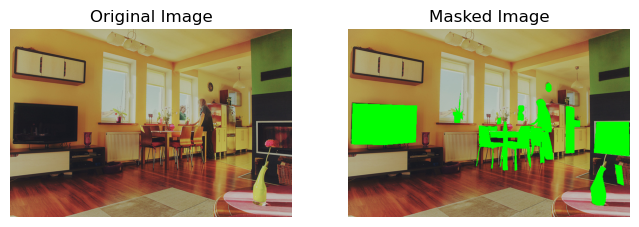

In [6]:
def test_with_selected_images(folder_path: str, file_names: list, annotation_file: str):
    
    
    with open(annotation_file, 'r') as f:
        coco_data = json.load(f)

    image_map = {img['file_name']: img['id'] for img in coco_data['images']}

    for image_name in file_names:
        if image_name not in image_map:
            print(f"Image {image_name} not found in the dataset.")
            continue
        
        image_id = image_map[image_name]
        related_annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]

        if not related_annotations:
            print(f"No annotations found for image {image_name}.")
            continue

        image_path = os.path.join(folder_path, image_name)

        try:
            image = plt.imread(image_path)  
        except FileNotFoundError:
            print(f"Image not found: {image_path}")
            continue

        masked_image = image.copy()
        for ann in related_annotations:
            segmentation = ann['segmentation']
            for seg in segmentation:
                seg_array = np.array(seg, dtype=np.float32)
                masked_image = draw_mask_on_image(masked_image, seg_array)

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(image)
        plt.axis("off")
        
        plt.subplot(1, 2, 2)
        plt.title("Masked Image")
        plt.imshow(masked_image)
        plt.axis("off")
        
        plt.show()

if __name__ == "__main__":
    folder_path = "./Data/val2017" 

    annotation_file = "./Data/annotations/instances_val2017.json"

    file_names = [
        "000000000139.jpg"
    ]

    test_with_selected_images(folder_path, file_names, annotation_file)


From the output we can see that the green mask is drawn on the majority of the items of this image.

Draw a mask with border on 5 random images with a blue mask as shown in the task.

In [7]:
def draw_mask_on_image(image: np.ndarray, mask: np.ndarray) -> np.ndarray:
    
    if mask.ndim == 1:
        mask = mask.reshape(-1, 2)  
    if mask.shape[1] != 2:
        raise ValueError("The mask should be a 2D array with 2 columns")

    assert mask.ndim == 2, "The mask should be a 2D array"
    image = image.copy()  

    polygon = Polygon(mask, closed=True, facecolor="blue", edgecolor="blue", alpha=0.5, linewidth=5)
    plt.gca().add_patch(polygon)  

    return image 

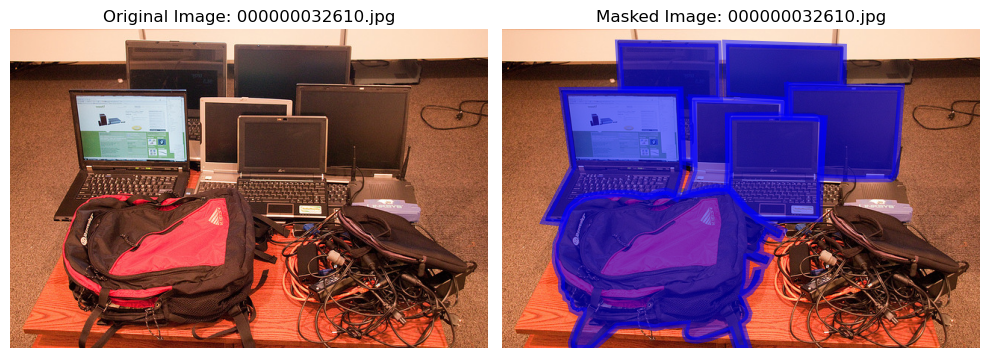

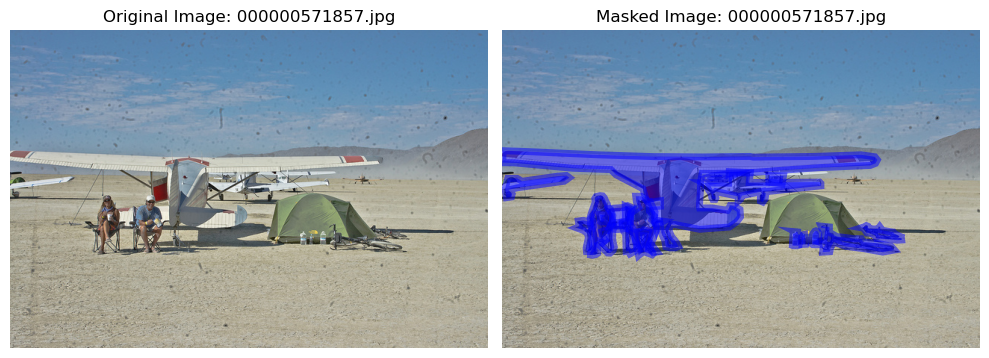

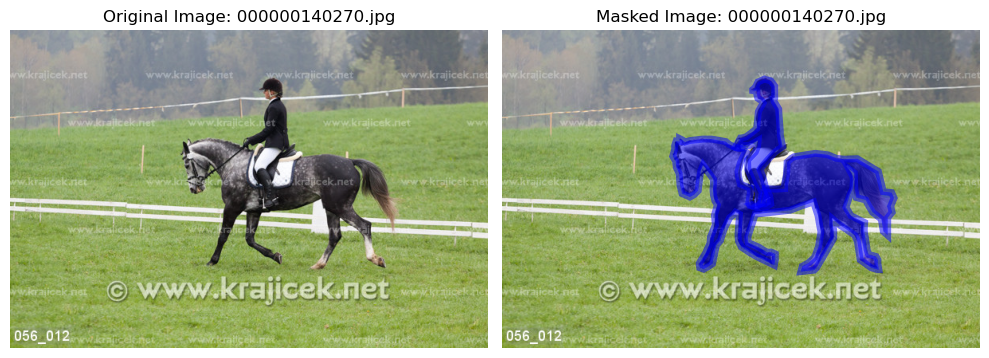

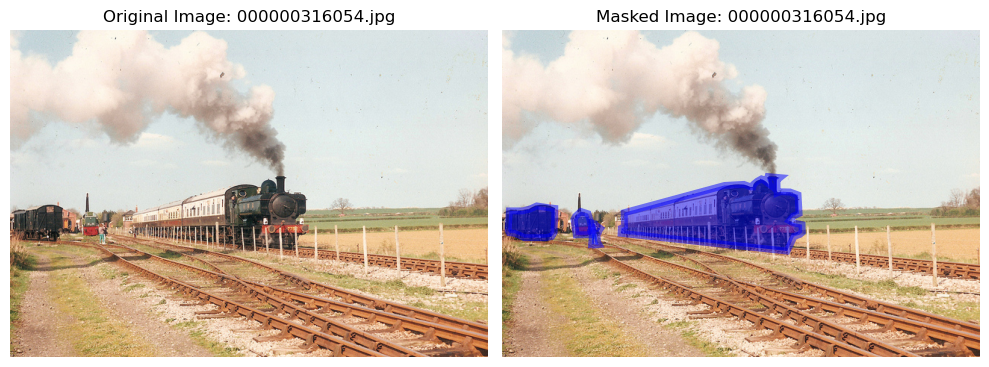

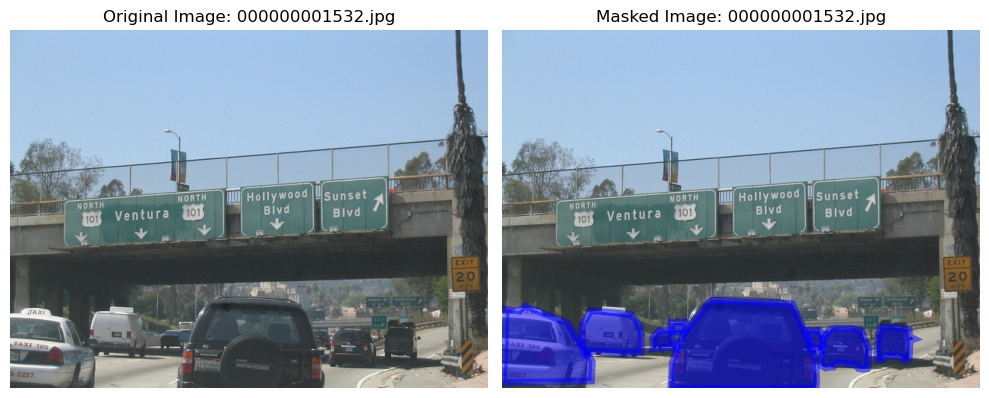

In [8]:
def test_with_random_images(folder_path: str, annotation_file: str, num_images: int = 5):

    with open(annotation_file, 'r') as f:
        coco_data = json.load(f)

    image_list = [img['file_name'] for img in coco_data['images']]
    image_map = {img['file_name']: img['id'] for img in coco_data['images']}

    random_images = random.sample(image_list, num_images)

    for image_name in random_images:
        image_id = image_map[image_name]
        related_annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]

        if not related_annotations:
            print(f"No annotations found for image {image_name}.")
            continue

        image_path = os.path.join(folder_path, image_name)

        try:
            image = plt.imread(image_path) 
        except FileNotFoundError:
            print(f"Image not found: {image_path}")
            continue

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title(f"Original Image: {image_name}")
        plt.imshow(image)
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.title(f"Masked Image: {image_name}")
        plt.imshow(image)
        plt.axis("off")

        for ann in related_annotations:
            segmentation = ann['segmentation']
            if isinstance(segmentation, list):  
                for seg in segmentation:
                    try:
                        seg_array = np.array(seg, dtype=np.float32)
                        draw_mask_on_image(image, seg_array)  
                    except ValueError:
                        print(f"Skipping invalid segmentation for annotation {ann['id']}")
                        continue

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    folder_path = "./Data/val2017" 

    annotation_file = "./Data/annotations/instances_val2017.json"

    test_with_random_images(folder_path, annotation_file, num_images=5)


Here we can see the blue mask with a blue border drawn on the featuring items on the image.

### Task 2: Gaze points on the image

First, we check the annotation of a specific image which we will need later to draw to gaze points.

In [9]:
annotation_files = [
    "Data/COCOSearch18-fixations-TP/coco_search18_fixations_TP_train_split1.json",
    "Data/COCOSearch18-fixations-TP/coco_search18_fixations_TP_train_split2.json",
    "Data/COCOSearch18-fixations-TP/coco_search18_fixations_TP_validation_split1.json",
    "Data/COCOSearch18-fixations-TP/coco_search18_fixations_TP_validation_split2.json",
]

annotations = []
for annotation_file in annotation_files:
    with open(annotation_file, "r") as f:
        annotations.extend(json.load(f))

image_name = "000000104669.jpg"
image_annotations = [ann for ann in annotations if ann["name"] == image_name]

for i, ann in enumerate(image_annotations, 1):
    print(f"Annotation {i}:")
    print(json.dumps(ann, indent=4))


Annotation 1:
{
    "name": "000000104669.jpg",
    "subject": 1,
    "task": "fork",
    "condition": "present",
    "bbox": [
        1430,
        334,
        98,
        692
    ],
    "X": [
        869.6,
        320.3,
        1508.7
    ],
    "Y": [
        466.3,
        566.7,
        745.7
    ],
    "T": [
        258,
        140,
        247
    ],
    "length": 3,
    "correct": 1,
    "RT": 690,
    "split": "valid"
}
Annotation 2:
{
    "name": "000000104669.jpg",
    "subject": 2,
    "task": "fork",
    "condition": "present",
    "bbox": [
        1430,
        334,
        98,
        692
    ],
    "X": [
        861.5,
        414.4,
        670.6,
        1076.8,
        1260.3,
        1444.2,
        1495.1
    ],
    "Y": [
        518.2,
        553.3,
        570.8,
        642.9,
        716.7,
        490.2,
        810.5
    ],
    "T": [
        291,
        206,
        89,
        154,
        127,
        129,
        521
    ],
    "length": 7,
  

print 5 random image names of the folder "images"

In [10]:
images_base_folder = "Data/images"

all_image_files = []
for root, _, files in os.walk(images_base_folder):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"): 
            all_image_files.append(os.path.join(root, file))

random_images = random.sample(all_image_files, 5)

print("Randomly selected images:")
for image_path in random_images:
    print(image_path)


Randomly selected images:
Data/images/bowl/000000343634.jpg
Data/images/bowl/000000098582.jpg
Data/images/keyboard/000000512240.jpg
Data/images/clock/000000293666.jpg
Data/images/laptop/000000226171.jpg


First, we choosed 5 random images and for each image. We grouped it by subjects, with details of horizontal (X), vertical (Y) gaze positions, and their respective durations (T). In the output we can see the duration of focus of each subject of the image on different regions.

In [11]:
annotation_files = [
    "Data/COCOSearch18-fixations-TP/coco_search18_fixations_TP_train_split1.json",
    "Data/COCOSearch18-fixations-TP/coco_search18_fixations_TP_train_split2.json",
    "Data/COCOSearch18-fixations-TP/coco_search18_fixations_TP_validation_split1.json",
    "Data/COCOSearch18-fixations-TP/coco_search18_fixations_TP_validation_split2.json",
]

target_images = [
    "000000147290.jpg",
    "000000460378.jpg",
    "000000325505.jpg",
    "000000516175.jpg",
    "000000314893.jpg",
]

gaze_points_by_image = {}

for annotation_file in annotation_files:
    with open(annotation_file, "r") as f:
        annotations = json.load(f)
        for ann in annotations:
            if ann["name"] in target_images:
                if ann["name"] not in gaze_points_by_image:
                    gaze_points_by_image[ann["name"]] = []
                gaze_points_by_image[ann["name"]].append({
                    "subject": ann["subject"],
                    "X": ann["X"],
                    "Y": ann["Y"],
                    "T": ann["T"]
                })

for image_name in target_images:
    print(f"\nGaze points for image: {image_name}")
    if image_name in gaze_points_by_image:
        for i, gaze_data in enumerate(gaze_points_by_image[image_name], 1):
            print(f"  Subject {gaze_data['subject']}:")
            print(f"    X (horizontal positions): {gaze_data['X']}")
            print(f"    Y (vertical positions): {gaze_data['Y']}")
            print(f"    T (durations): {gaze_data['T']}")
    else:
        print("  No gaze points found.")



Gaze points for image: 000000147290.jpg
  Subject 1:
    X (horizontal positions): [830.6, 843.7, 1028.2, 1142.7, 1135.0]
    Y (vertical positions): [527.3, 543.7, 784.4, 700.9, 776.9]
    T (durations): [235, 70, 136, 304, 905]
  Subject 2:
    X (horizontal positions): [760.5, 853.7, 869.2, 845.1, 875.5]
    Y (vertical positions): [474.4, 541.4, 1011.4, 929.3, 967.6]
    T (durations): [206, 270, 180, 229, 234]
  Subject 5:
    X (horizontal positions): [648.4, 876.6, 1124.9, 1137.5]
    Y (vertical positions): [428.5, 614.2, 673.4, 783.5]
    T (durations): [230, 139, 150, 238]
  Subject 6:
    X (horizontal positions): [897.8, 857.1, 825.1, 831.0, 890.0]
    Y (vertical positions): [525.7, 544.8, 803.2, 913.7, 936.8]
    T (durations): [360, 295, 138, 238, 300]
  Subject 3:
    X (horizontal positions): [827.9, 973.0, 1162.9, 1154.2]
    Y (vertical positions): [429.0, 628.5, 681.3, 775.6]
    T (durations): [249, 111, 154, 212]
  Subject 10:
    X (horizontal positions): [832.0

Draw all the gaze points of 5 random images

In [ ]:
all_image_files = []
for root, _, files in os.walk(images_base_folder):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"): 
            all_image_files.append(os.path.join(root, file))

In [13]:
gaze_points_by_image = {}
for annotation_file in annotation_files:
    with open(annotation_file, "r") as f:
        annotations = json.load(f)
        for ann in annotations:
            if ann["name"] not in gaze_points_by_image:
                gaze_points_by_image[ann["name"]] = []
            gaze_points_by_image[ann["name"]].append({
                "subject": ann["subject"],
                "X": ann["X"],
                "Y": ann["Y"],
                "T": ann["T"]
            })

In [ ]:
random_images = random.sample(all_image_files, 5)

def draw_gaze_points_on_image(image: np.ndarray, gaze_points: list) -> np.ndarray:
    pil_image = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)
    font = ImageFont.load_default()
    for i, (x, y, duration) in enumerate(gaze_points):
        radius = int(duration / 50)  
        x, y = int(x), int(y)
        draw.ellipse((x - radius, y - radius, x + radius, y + radius), fill="red", outline="yellow")
        draw.text((x + radius + 5, y - radius), str(i + 1), fill="yellow", font=font) 

    for i in range(len(gaze_points) - 1):
        draw.line([(gaze_points[i][0], gaze_points[i][1]), (gaze_points[i + 1][0], gaze_points[i + 1][1])],
                  fill="yellow", width=2)

    return np.array(pil_image)


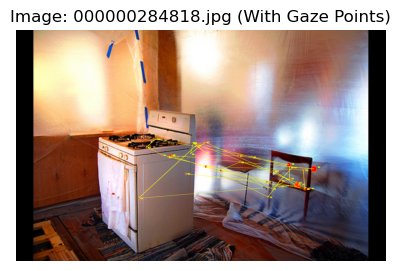

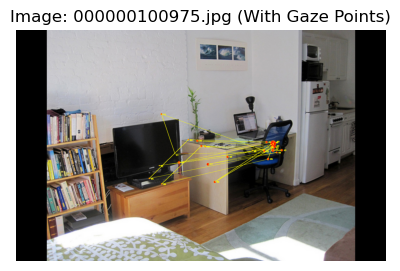

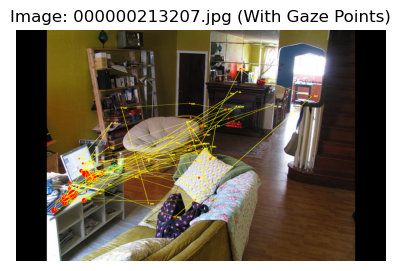

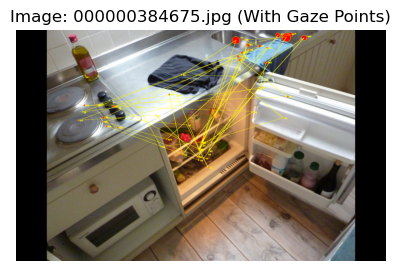

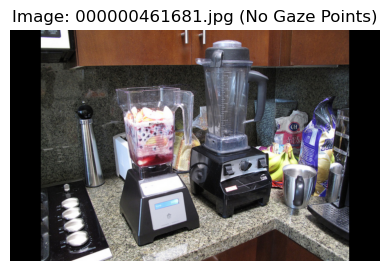

In [15]:
for image_path in random_images:
    image_name = os.path.basename(image_path)
    gaze_points = []

    if image_name in gaze_points_by_image:
        for gaze_data in gaze_points_by_image[image_name]:
            for x, y, t in zip(gaze_data["X"], gaze_data["Y"], gaze_data["T"]):
                gaze_points.append((x, y, t))

    image = np.array(Image.open(image_path).convert("RGB"))
    if gaze_points:
        processed_image = draw_gaze_points_on_image(image, gaze_points)
    else:
        processed_image = image  

    plt.figure(figsize=(5, 3))
    plt.imshow(processed_image)
    plt.axis("off")
    plt.title(f"Image: {image_name} {'(With Gaze Points)' if gaze_points else '(No Gaze Points)'}")
    plt.show()


Reduce to 3 random gaze points: We redefined the function with the condition that only 3 gaze points are displayed. We skip the images without gaze points.

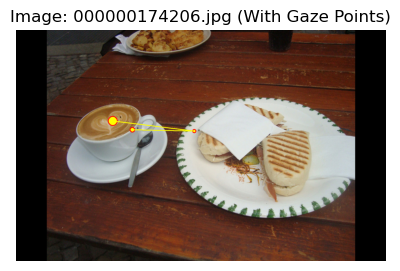

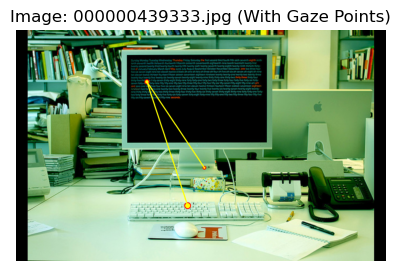

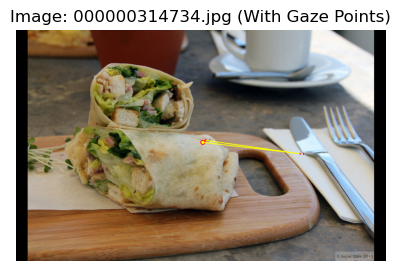

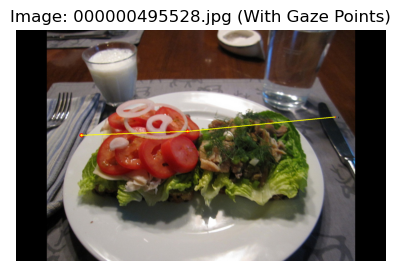

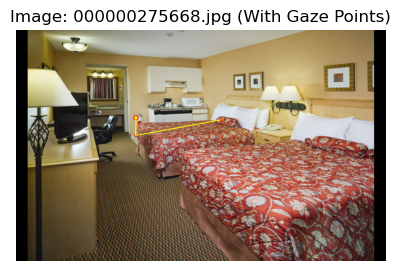

In [16]:
def draw_gaze_points_on_image(image: np.ndarray, gaze_points: list) -> np.ndarray:
    pil_image = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)
    font = ImageFont.load_default()

    if len(gaze_points) > 3:
        gaze_points = random.sample(gaze_points, 3)

    for i, (x, y, duration) in enumerate(gaze_points):
        radius = int(duration / 20)  
        x, y = int(x), int(y)
 
        draw.ellipse((x - radius, y - radius, x + radius, y + radius), fill="red")

        inner_radius = radius - 4 
        draw.ellipse(
            (x - inner_radius, y - inner_radius, x + inner_radius, y + inner_radius),
            fill="yellow",
        )

        draw.text((x + radius + 10, y - radius), str(i + 1), fill="black", font=font)

    for i in range(len(gaze_points) - 1):
        draw.line([(gaze_points[i][0], gaze_points[i][1]), (gaze_points[i + 1][0], gaze_points[i + 1][1])],
                  fill="yellow", width=5)  

    return np.array(pil_image)

images_to_display = 5
displayed_images = 0

random.shuffle(all_image_files)

for image_path in all_image_files:
    if displayed_images >= images_to_display:
        break

    image_name = os.path.basename(image_path)
    gaze_points = []

    if image_name in gaze_points_by_image:
        for gaze_data in gaze_points_by_image[image_name]:
            for x, y, t in zip(gaze_data["X"], gaze_data["Y"], gaze_data["T"]):
                gaze_points.append((x, y, t))

    if not gaze_points:
        continue

    image = np.array(Image.open(image_path).convert("RGB"))
    processed_image = draw_gaze_points_on_image(image, gaze_points)

    plt.figure(figsize=(5, 3))
    plt.imshow(processed_image)
    plt.axis("off")
    plt.title(f"Image: {image_name} (With Gaze Points)")
    plt.show()

    displayed_images += 1


Finally, we test it with 5 random images and 3 random gaze points on each image. We changed the test code to: n, m = 5, 3 and we get 3x5 subplots, as shown in the ouput.

In [17]:
def draw_gaze_points_on_image(image: np.ndarray, gaze_points: np.ndarray) -> np.ndarray:
    if gaze_points.ndim != 2 or gaze_points.shape[1] != 3:
        raise ValueError("The gaze points should be a 2D array with 3 columns: x, y, and duration")

    image = image.copy()

    pil_image = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)
    font = ImageFont.load_default()  

    for i, (x, y, duration) in enumerate(gaze_points):
        radius = int(duration / 20)  
        x, y = int(x), int(y)

        draw.ellipse((x - radius, y - radius, x + radius, y + radius), fill="red")

        inner_radius = radius - 4
        draw.ellipse(
            (x - inner_radius, y - inner_radius, x + inner_radius, y + inner_radius),
            fill="yellow",
        )

        draw.text((x + radius + 10, y - radius), str(i + 1), fill="black", font=font)

    for i in range(len(gaze_points) - 1):
        draw.line([(gaze_points[i][0], gaze_points[i][1]),
                   (gaze_points[i + 1][0], gaze_points[i + 1][1])],
                  fill="yellow", width=5)

    return np.array(pil_image)


In [18]:
def choose_random_image() -> np.ndarray:
    random_image_path = random.choice(all_image_files)
    return np.array(Image.open(random_image_path).convert("RGB"))

def choose_random_gaze_points() -> np.ndarray:
    while True:  
        image_name = os.path.basename(random.choice(all_image_files))
        if image_name in gaze_points_by_image and gaze_points_by_image[image_name]:
            gaze_data = random.choice(gaze_points_by_image[image_name])
            gaze_points = list(zip(gaze_data["X"], gaze_data["Y"], gaze_data["T"]))
            if gaze_points:  
                return np.array(random.sample(gaze_points, min(3, len(gaze_points))))


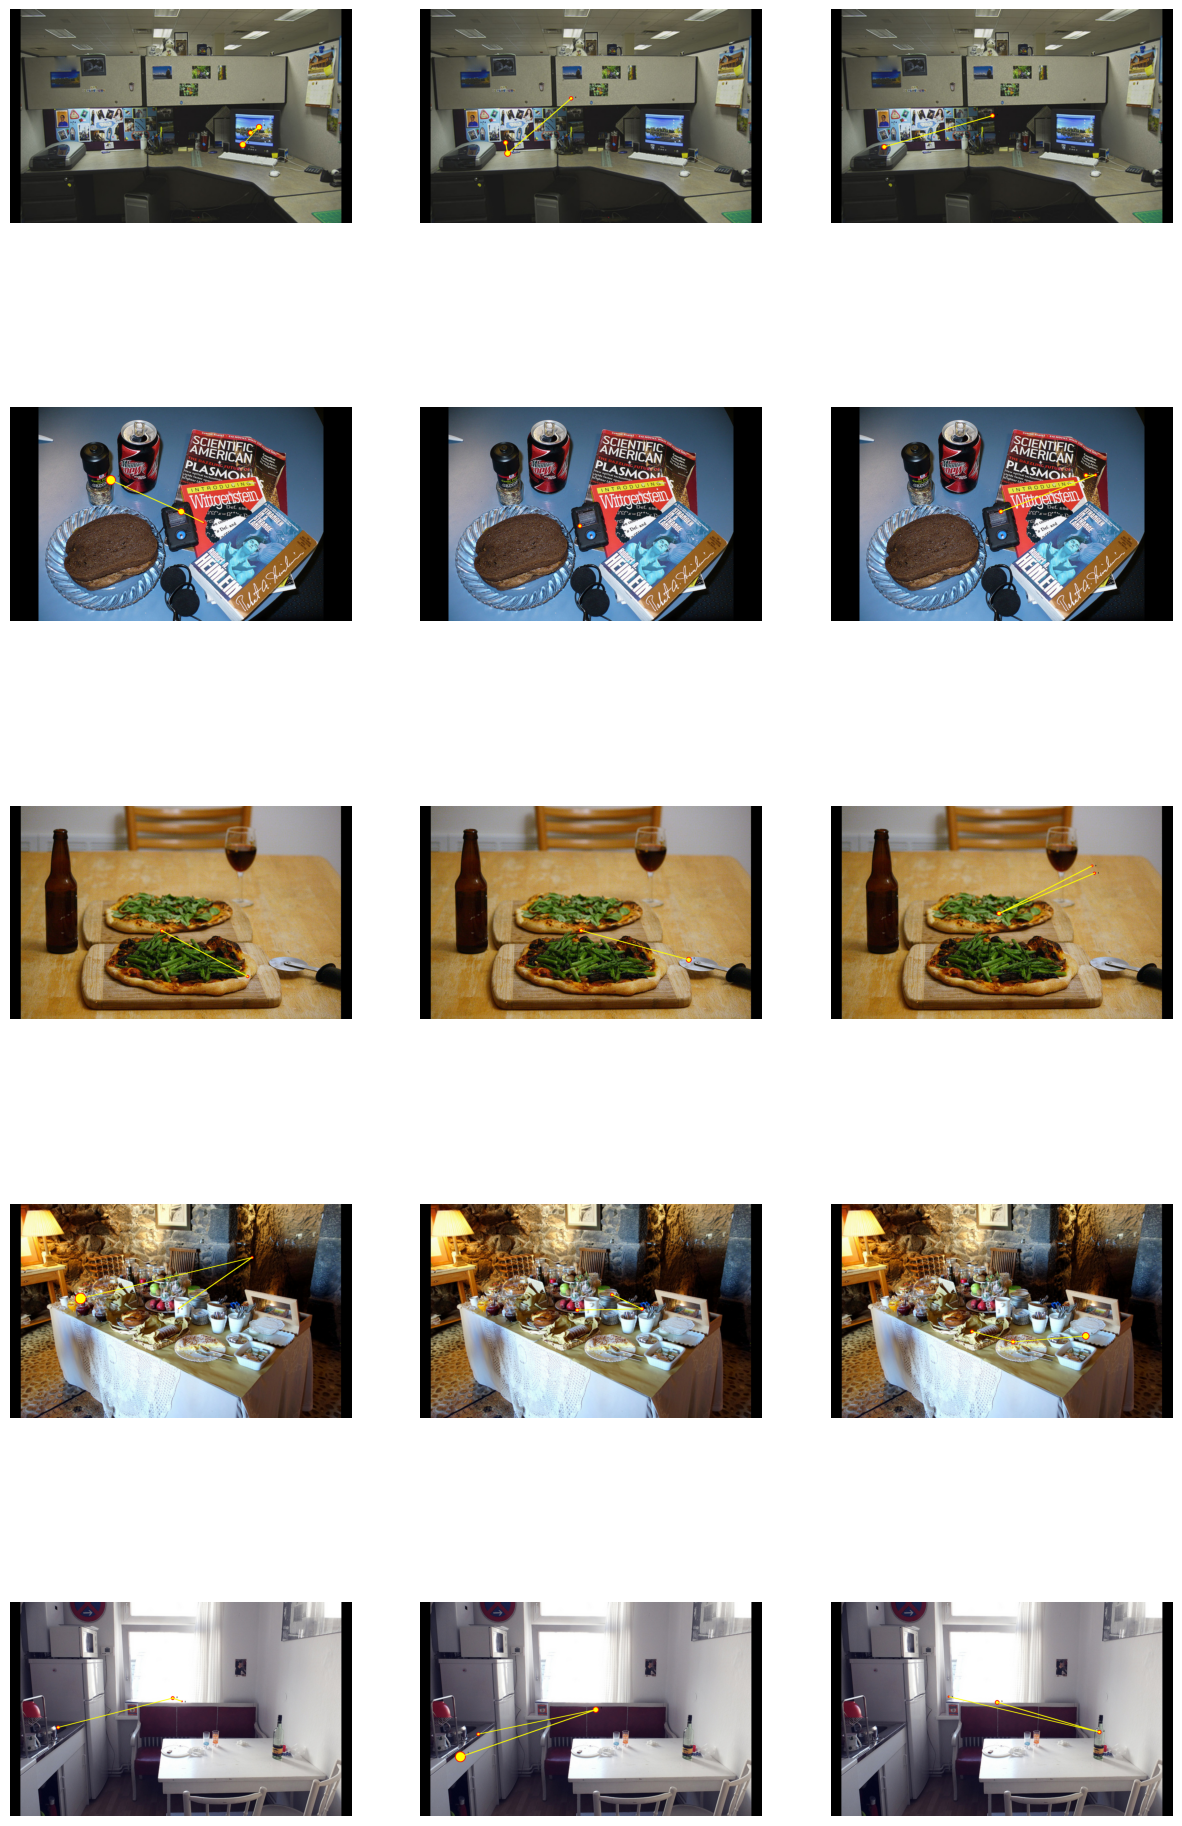

In [19]:
n, m = 5,3
fig, axes = plt.subplots(n, m, figsize=(5 * m, 5 * n))

for row in axes:
    img = choose_random_image()
    for ax in row:
        gaze_points = choose_random_gaze_points()
        ax.imshow(draw_gaze_points_on_image(img, gaze_points))
        ax.axis("off")
plt.show()


### Task 3: Calculate average area

 Print the classes of the dataset

In [20]:
def print_coco_classes(objects: dict):

    categories = objects['categories']

    print("COCO Classes:")
    for category in categories:
        print(f"ID: {category['id']}, Name: {category['name']}")

with open("Data/annotations/instances_train2017.json", "r") as f:
    coco_annotations = json.load(f)
print_coco_classes(coco_annotations)


COCO Classes:
ID: 1, Name: person
ID: 2, Name: bicycle
ID: 3, Name: car
ID: 4, Name: motorcycle
ID: 5, Name: airplane
ID: 6, Name: bus
ID: 7, Name: train
ID: 8, Name: truck
ID: 9, Name: boat
ID: 10, Name: traffic light
ID: 11, Name: fire hydrant
ID: 13, Name: stop sign
ID: 14, Name: parking meter
ID: 15, Name: bench
ID: 16, Name: bird
ID: 17, Name: cat
ID: 18, Name: dog
ID: 19, Name: horse
ID: 20, Name: sheep
ID: 21, Name: cow
ID: 22, Name: elephant
ID: 23, Name: bear
ID: 24, Name: zebra
ID: 25, Name: giraffe
ID: 27, Name: backpack
ID: 28, Name: umbrella
ID: 31, Name: handbag
ID: 32, Name: tie
ID: 33, Name: suitcase
ID: 34, Name: frisbee
ID: 35, Name: skis
ID: 36, Name: snowboard
ID: 37, Name: sports ball
ID: 38, Name: kite
ID: 39, Name: baseball bat
ID: 40, Name: baseball glove
ID: 41, Name: skateboard
ID: 42, Name: surfboard
ID: 43, Name: tennis racket
ID: 44, Name: bottle
ID: 46, Name: wine glass
ID: 47, Name: cup
ID: 48, Name: fork
ID: 49, Name: knife
ID: 50, Name: spoon
ID: 51, Na

Here, we define the function to calculate the average area of each object.

In [21]:
def calculate_average_area_of_objects(json_file: str) -> pd.DataFrame:

    with open(json_file, 'r') as f:
        coco_data = json.load(f)

    categories = {cat['id']: cat['name'] for cat in coco_data['categories']}

    areas_by_category = {cat_id: [] for cat_id in categories.keys()}

    for annotation in coco_data['annotations']:
        cat_id = annotation['category_id']
        area = annotation['area']
        areas_by_category[cat_id].append(area)

    results = []
    for cat_id, areas in areas_by_category.items():
        avg_area = np.mean(areas) if areas else 0
        results.append({"class name": categories[cat_id], "average area": avg_area})
 
    output = pd.DataFrame(results)

    assert output.shape[1] == 2, "The output should have 2 columns"
    assert output.dtypes.to_dict() == {"class name": object, "average area": float}, "The columns should have the correct data types"
    assert all(output["average area"] >= 0), "The average area should be non-negative"
    assert len(output['class name'].unique()) == len(output), "The class names should be unique"

    return output


Here, we export the results as csv. 

In [22]:
annotation_file = "Data/annotations/instances_train2017.json"
average_areas_df = calculate_average_area_of_objects(annotation_file)

print(average_areas_df)

average_areas_df.to_csv("average_areas_per_class.csv", index=False)


    class name  average area
0       person  11177.115991
1      bicycle   7414.126600
2          car   4635.537764
3   motorcycle  17941.518368
4     airplane  20179.112942
..         ...           ...
75        vase   8625.149502
76    scissors   7803.043870
77  teddy bear  21908.647909
78  hair drier   5389.544806
79  toothbrush   3066.755894

[80 rows x 2 columns]


TASK 4: Calculate normalized average

In [23]:
def calculate_average_normalized_area_of_objects(json_file: str) -> pd.DataFrame:

    with open(json_file, 'r') as f:
        coco_data = json.load(f)

    categories = {cat['id']: cat['name'] for cat in coco_data['categories']}
    normalized_areas_by_category = {cat_id: [] for cat_id in categories.keys()}

    image_dims = {img['id']: img['width'] * img['height'] for img in coco_data['images']}

    for annotation in coco_data['annotations']:
        cat_id = annotation['category_id']
        area = annotation['area']
        image_area = image_dims[annotation['image_id']] 
        normalized_area = area / image_area
        normalized_areas_by_category[cat_id].append(normalized_area)

    results = []
    for cat_id, normalized_areas in normalized_areas_by_category.items():
        avg_normalized_area = np.mean(normalized_areas) if normalized_areas else 0
        results.append({"class name": categories[cat_id], "average normalized area": avg_normalized_area})

    output = pd.DataFrame(results)

    assert output.shape[1] == 2, "The output should have 2 columns"
    assert output.dtypes.to_dict() == {"class name": object, "average normalized area": float}, "The columns should have the correct data types"
    assert all(output["average normalized area"] >= 0), "The average normalized area should be non-negative"
    assert all(output["average normalized area"] <= 1), "The average normalized area should be less than or equal to 1"
    assert len(output['class name'].unique()) == len(output), "The class names should be unique"

    return output


In [24]:
annotation_file = "Data/annotations/instances_train2017.json"
average_normalized_areas_df = calculate_average_normalized_area_of_objects(annotation_file)

print(average_normalized_areas_df)

average_normalized_areas_df.to_csv("average_normalized_areas_per_class.csv", index=False)


    class name  average normalized area
0       person                 0.040600
1      bicycle                 0.026888
2          car                 0.016962
3   motorcycle                 0.063835
4     airplane                 0.073115
..         ...                      ...
75        vase                 0.032016
76    scissors                 0.028980
77  teddy bear                 0.082085
78  hair drier                 0.019504
79  toothbrush                 0.011902

[80 rows x 2 columns]


ADVANCED TASK 1 

Print gaze points for the first few entries

In [25]:
gaze_x = gaze_data.get("X", [])
gaze_y = gaze_data.get("Y", [])
gaze_t = gaze_data.get("T", [])

print("Gaze X Coordinates:", gaze_x)
print("Gaze Y Coordinates:", gaze_y)
print("Gaze Durations (T):", gaze_t)

print("\nFirst 5 Gaze Points:")
for i, (x, y, t) in enumerate(zip(gaze_x, gaze_y, gaze_t)):
    print(f"Gaze Point {i + 1}: X={x}, Y={y}, Duration={t}")
    if i >= 4: 
        break


Gaze X Coordinates: [788.1, 407.2, 544.1, 379.6]
Gaze Y Coordinates: [543.0, 445.3, 398.7, 434.5]
Gaze Durations (T): [303, 370, 224, 81]

First 5 Gaze Points:
Gaze Point 1: X=788.1, Y=543.0, Duration=303
Gaze Point 2: X=407.2, Y=445.3, Duration=370
Gaze Point 3: X=544.1, Y=398.7, Duration=224
Gaze Point 4: X=379.6, Y=434.5, Duration=81


Load COCO Annotations

Inspects and prints the number of images, annotations, and categories in the dataset.

In [26]:
with open("Data/annotations/instances_train2017.json", "r") as f:
    coco_data = json.load(f)

print(f"Number of images: {len(coco_data['images'])}")
print(f"Number of annotations: {len(coco_data['annotations'])}")
print(f"Number of categories: {len(coco_data['categories'])}")


Number of images: 118287
Number of annotations: 860001
Number of categories: 80


Load Gaze Data

Groups gaze points (X, Y) and reaction times (RT) by image name.

In [27]:
gaze_points_by_image = {}

for gaze_file in annotation_files:
    with open(gaze_file, "r") as f:
        gaze_data = json.load(f)
        for gaze_entry in gaze_data:
            image_name = gaze_entry["name"]
            if image_name not in gaze_points_by_image:
                gaze_points_by_image[image_name] = {
                    "X": gaze_entry["X"],
                    "Y": gaze_entry["Y"],
                    "reaction_time": gaze_entry["RT"],
                }

print(f"Number of images with gaze data: {len(gaze_points_by_image)}")


Number of images with gaze data: 2241


Map Image Names to COCO Image IDs 

Gaze data contains image names, but COCO annotations refer to images using their image_id field. Without this mapping, we wouldn't be able to determine which objects (bounding boxes, categories) in the COCO annotations correspond to the gaze data for a specific image.

In [28]:
image_name_to_id = {image['file_name']: image['id'] for image in coco_data['images']}

example_image_name = list(gaze_points_by_image.keys())[0]
example_image_id = image_name_to_id.get(example_image_name, None)
print(f"Example Image Name: {example_image_name}")
print(f"Mapped COCO Image ID: {example_image_id}")


Example Image Name: 000000478726.jpg
Mapped COCO Image ID: 478726


Precompute Annotations

Advantages: The annotations are pre-organized into a dictionary for faster lookup; Significantly reduces runtime for datasets with many images and annotations; Accessing annotations_by_image[image_id] is cleaner and faster than filtering annotations repeatedly. (I tried without it and didnt get ouput even after 10min)

In [29]:
annotations_by_image = {}

for ann in coco_data['annotations']:
    image_id = ann['image_id']
    if image_id not in annotations_by_image:
        annotations_by_image[image_id] = []
    annotations_by_image[image_id].append(ann)

print(f"Precomputed annotations for {len(annotations_by_image)} images.")


Precomputed annotations for 117266 images.


Process Gaze Points and Objects

Loops through each image in the gaze data. For each gaze point, checks if it falls inside any object’s bounding box in the COCO annotations. Calculates the total duration (normalized by object area) for each class.

This step connects gaze points to objects, showing how long users focused on objects in different categories. It adjusts the gaze duration based on object size, making it easier to compare attention across objects of different sizes.

In [30]:
from shapely.geometry import Point

class_durations = {}

for image_name, gaze_info in gaze_points_by_image.items():
    if image_name not in image_name_to_id:
        continue

    image_id = image_name_to_id[image_name]

    objects = annotations_by_image.get(image_id, [])

    gaze_x = gaze_info["X"]
    gaze_y = gaze_info["Y"]
    reaction_time = gaze_info["reaction_time"] / len(gaze_x) 

    for x, y in zip(gaze_x, gaze_y):
        gaze_point = Point(x, y)

        for obj in objects:
            x_min, y_min, width, height = obj['bbox']
            x_max, y_max = x_min + width, y_min + height
            if x_min <= gaze_point.x <= x_max and y_min <= gaze_point.y <= y_max:
                category_id = obj['category_id']

                area = width * height
                duration_normalized = reaction_time / area

                if category_id not in class_durations:
                    class_durations[category_id] = 0
                class_durations[category_id] += duration_normalized

print(f"Processed gaze points and objects for {len(gaze_points_by_image)} images.")


Processed gaze points and objects for 2241 images.


Calculate Average Duration for Each Class

The average duration tells us how attractive each class is, considering the number of objects in that class.

In [31]:
category_id_to_name = {cat['id']: cat['name'] for cat in coco_data['categories']}

class_object_counts = {cat['id']: 0 for cat in coco_data['categories']}
for obj in coco_data['annotations']:
    class_object_counts[obj['category_id']] += 1

average_durations = {
    category_id_to_name[cat_id]: class_durations[cat_id] / class_object_counts[cat_id]
    for cat_id in class_durations
    if class_object_counts[cat_id] > 0
}

for class_name, avg_duration in average_durations.items():
    print(f"Class: {class_name}, Average Duration: {avg_duration:.6f}")


Class: mouse, Average Duration: 0.000020
Class: dining table, Average Duration: 0.000025
Class: wine glass, Average Duration: 0.000002
Class: fork, Average Duration: 0.000007
Class: spoon, Average Duration: 0.000024
Class: cup, Average Duration: 0.000071
Class: knife, Average Duration: 0.000012
Class: bowl, Average Duration: 0.000033
Class: banana, Average Duration: 0.000002
Class: pizza, Average Duration: 0.000025
Class: book, Average Duration: 0.000002
Class: bottle, Average Duration: 0.000002
Class: couch, Average Duration: 0.000045
Class: donut, Average Duration: 0.000006
Class: keyboard, Average Duration: 0.000030
Class: sandwich, Average Duration: 0.000037
Class: cake, Average Duration: 0.000025
Class: laptop, Average Duration: 0.000011
Class: chair, Average Duration: 0.000012
Class: bed, Average Duration: 0.000030
Class: vase, Average Duration: 0.000022
Class: broccoli, Average Duration: 0.000046
Class: suitcase, Average Duration: 0.000000
Class: carrot, Average Duration: 0.0000

Find the Most Attractive Class

Finds the class with the highest average gaze duration.

In [32]:
most_attractive_class = max(average_durations, key=average_durations.get)
print(f"The most attractive class is: {most_attractive_class} with an average duration of {average_durations[most_attractive_class]:.6f}")


The most attractive class is: toaster with an average duration of 0.000374


Find the pair/triplet of classes that are most likely to be seen after each other

Match Gaze Points to Classes 

In [33]:
gaze_sequences_by_image = {}

for image_name, gaze_info in gaze_points_by_image.items():
    if image_name not in image_name_to_id:
        continue

    image_id = image_name_to_id[image_name]
    objects = annotations_by_image.get(image_id, [])

    gaze_x = gaze_info["X"]
    gaze_y = gaze_info["Y"]
    reaction_time = gaze_info["reaction_time"]

    class_sequence = []

    for x, y in zip(gaze_x, gaze_y):
        gaze_point = Point(x, y)
        matched_class = None

        for obj in objects:
            x_min, y_min, width, height = obj['bbox']
            x_max, y_max = x_min + width, y_min + height
            if x_min <= gaze_point.x <= x_max and y_min <= gaze_point.y <= y_max:
                matched_class = obj['category_id']
                break  

        if matched_class:
            class_sequence.append(matched_class)

    gaze_sequences_by_image[image_name] = class_sequence


Extract Pairs and Triplets

In [34]:
pair_counts = Counter()
triplet_counts = Counter()

for class_sequence in gaze_sequences_by_image.values():
    unique_sequence = [class_sequence[i] for i in range(len(class_sequence)) if i == 0 or class_sequence[i] != class_sequence[i - 1]]

    for i in range(len(unique_sequence) - 1):
        pair = (unique_sequence[i], unique_sequence[i + 1])
        pair_counts[pair] += 1

    for i in range(len(unique_sequence) - 2):
        triplet = (unique_sequence[i], unique_sequence[i + 1], unique_sequence[i + 2])
        triplet_counts[triplet] += 1


Map IDs to Class Names

In [35]:
category_id_to_name = {cat['id']: cat['name'] for cat in coco_data['categories']}

pair_counts_named = Counter({(category_id_to_name[p[0]], category_id_to_name[p[1]]): count for p, count in pair_counts.items()})
triplet_counts_named = Counter({(category_id_to_name[t[0]], category_id_to_name[t[1]], category_id_to_name[t[2]]): count for t, count in triplet_counts.items()})


Find the Most Common Pairs and Triplets

In [36]:
most_common_pair = pair_counts_named.most_common(1)[0]
most_common_triplet = triplet_counts_named.most_common(1)[0]

print(f"The most common pair of classes is: {most_common_pair[0]} with a frequency of {most_common_pair[1]}")
print(f"The most common triplet of classes is: {most_common_triplet[0]} with a frequency of {most_common_triplet[1]}")


The most common pair of classes is: ('dining table', 'bowl') with a frequency of 4
The most common triplet of classes is: ('dining table', 'knife', 'dining table') with a frequency of 2
